In [1]:
%load_ext autoreload
%autoreload 2
import sympy as sp
from SymbolsHolder import make_derivative_symbol
from qbee import polynomialize, quadratic_linearize
from visualization.vizualization import visualize

sp.init_printing()

x, y, z = sp.symbols('x, y, z')
dot_x, dot_y, dot_z = list(map(make_derivative_symbol, [x, y, z]))


### Simple systems

In [2]:
system = [
    sp.Eq(dot_x, x**3)
]

system

In [3]:
quadratic_linearize(system)

In [4]:
system = \
    [
        sp.Eq(dot_x, x**3),
        sp.Eq(dot_y, x * z**2),
        sp.Eq(dot_z, z)
    ]

system

In [5]:
quadratic_linearize(system)

# Example 6.3.5 from [article](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2012/EECS-2012-217.pdf)

There are several methods to quadratic-linearize a system.

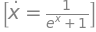

In [6]:
from qbee import EquationSystem

system = EquationSystem([
    sp.Eq(dot_x, 1 / (1 + sp.exp(x)))
])

system.equations

In [7]:
system.polynomialize()
system.equations


In [8]:
ql_system = system.quadratic_linearized(mode='optimal', auxiliary_eq_type='differential', method_optimal='bfs',
                            debug='info', log_file='log.csv')
ql_system.equations

System nodes queued:  95%|█████████████████████████████████▎ | 20/21 [00:00<00:00, 29.23node/s, Current depth level: 1]


In [9]:
ql_system.statistics

steps: 5
Method's name: BFS
depth: 1

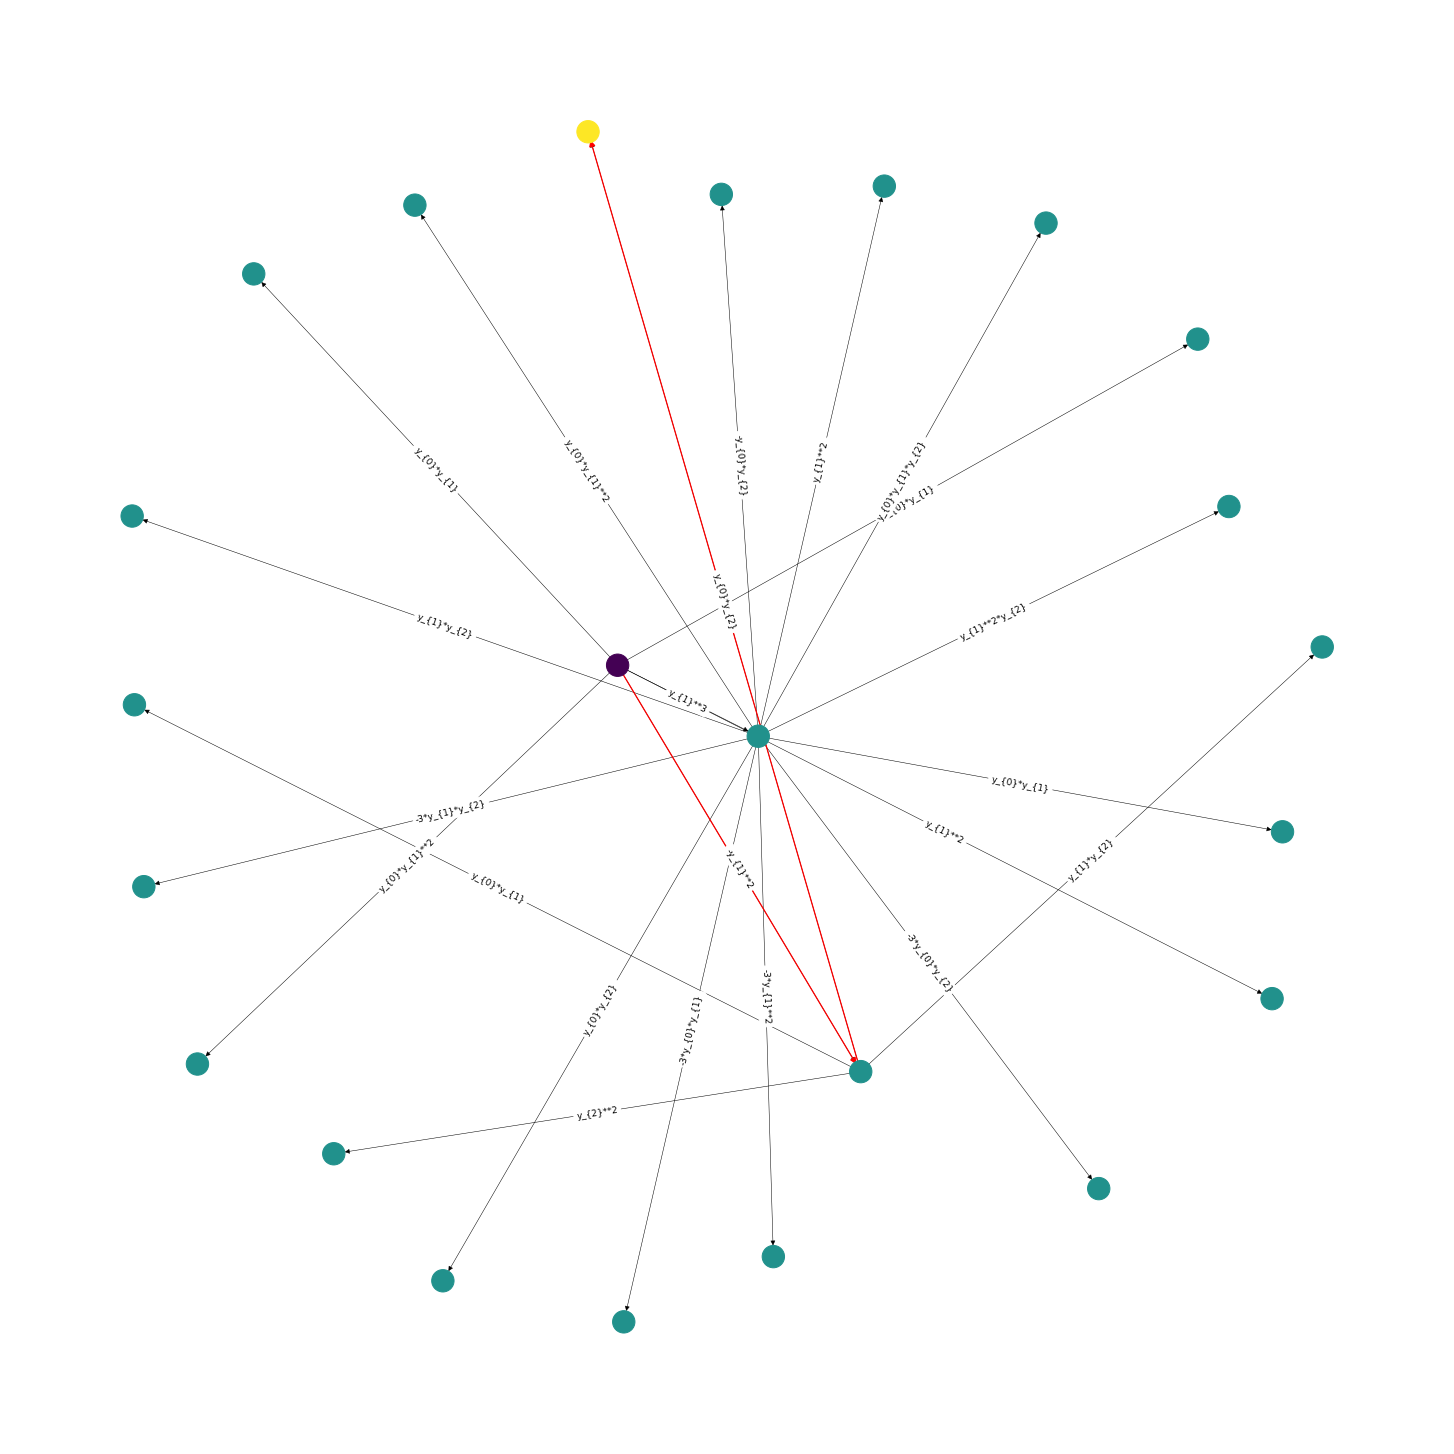

In [10]:
visualize('graph_log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


In [11]:
ql_system = system.quadratic_linearized(mode='optimal', auxiliary_eq_type='differential', method_optimal='iddfs',
                            heuristics='replacement-value', initial_max_depth=1, debug='info', log_file='log.csv')
ql_system.equations

System nodes queued:  95%|█████████████████████████████▌ | 20/21 [00:00<00:00, 44.48node/s, Current max depth level: 1]


In [12]:
ql_system.statistics

steps: 5
Method's name: IDDFS
depth: 1

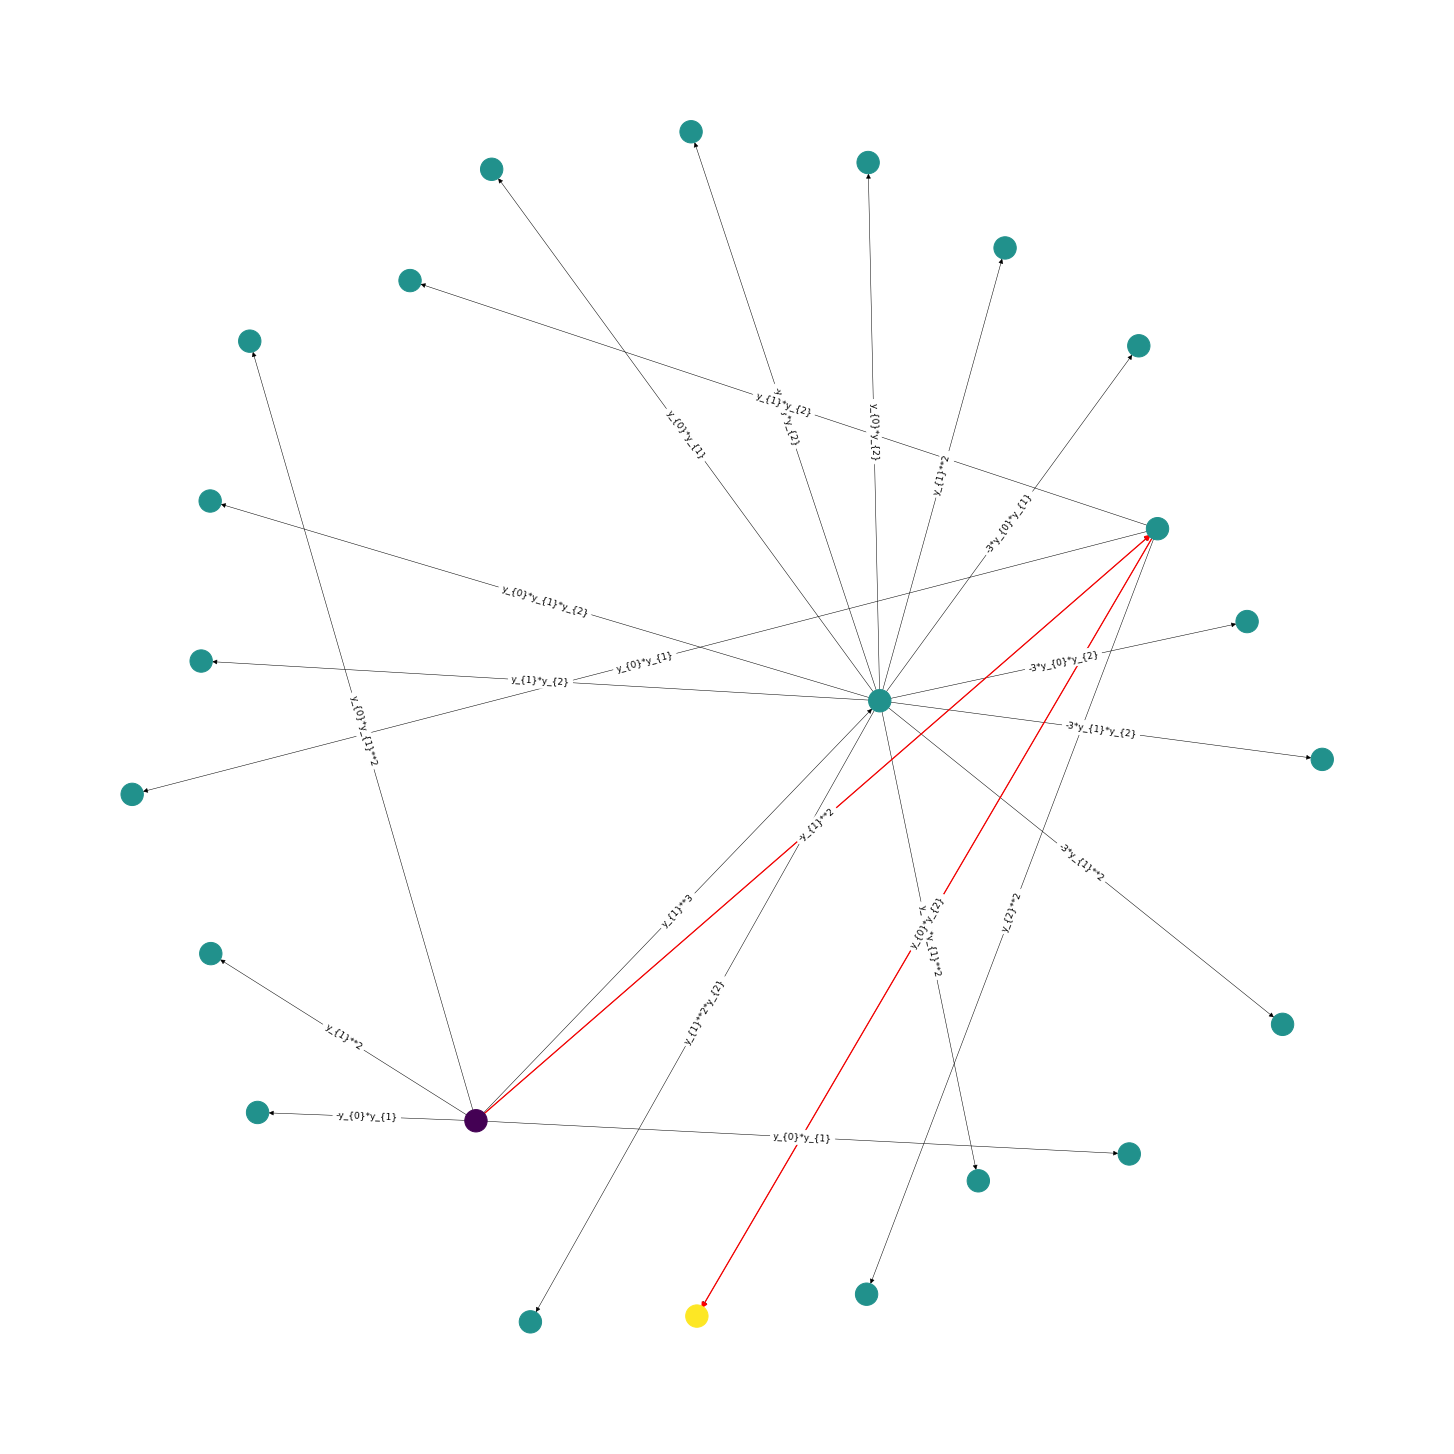

In [13]:
visualize('graph_log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


# $x^2y^2z^2$ Example

In [14]:
x, y, z, w = sp.symbols('x, y, z, w')
x_dot = make_derivative_symbol(x)
y_dot = make_derivative_symbol(y)
z_dot = make_derivative_symbol(z)
w_dow = make_derivative_symbol(w)

system = EquationSystem([
    sp.Eq(x_dot, 0),
    sp.Eq(y_dot, 0),
    sp.Eq(z_dot, 0),
    sp.Eq(w_dow, x**2 * y**2 * z**2)
])

system.polynomialize()

system.equations

In [15]:
ql_system = system.quadratic_linearized(mode='optimal', auxiliary_eq_type='differential', method_optimal='bfs',
                            debug='info', log_file='log.csv')
ql_system.equations

System nodes queued:  98%|██████████████████████████████████▏| 39/40 [00:01<00:00, 21.56node/s, Current depth level: 1]


In [16]:
ql_system.statistics

steps: 6
Method's name: BFS
depth: 1

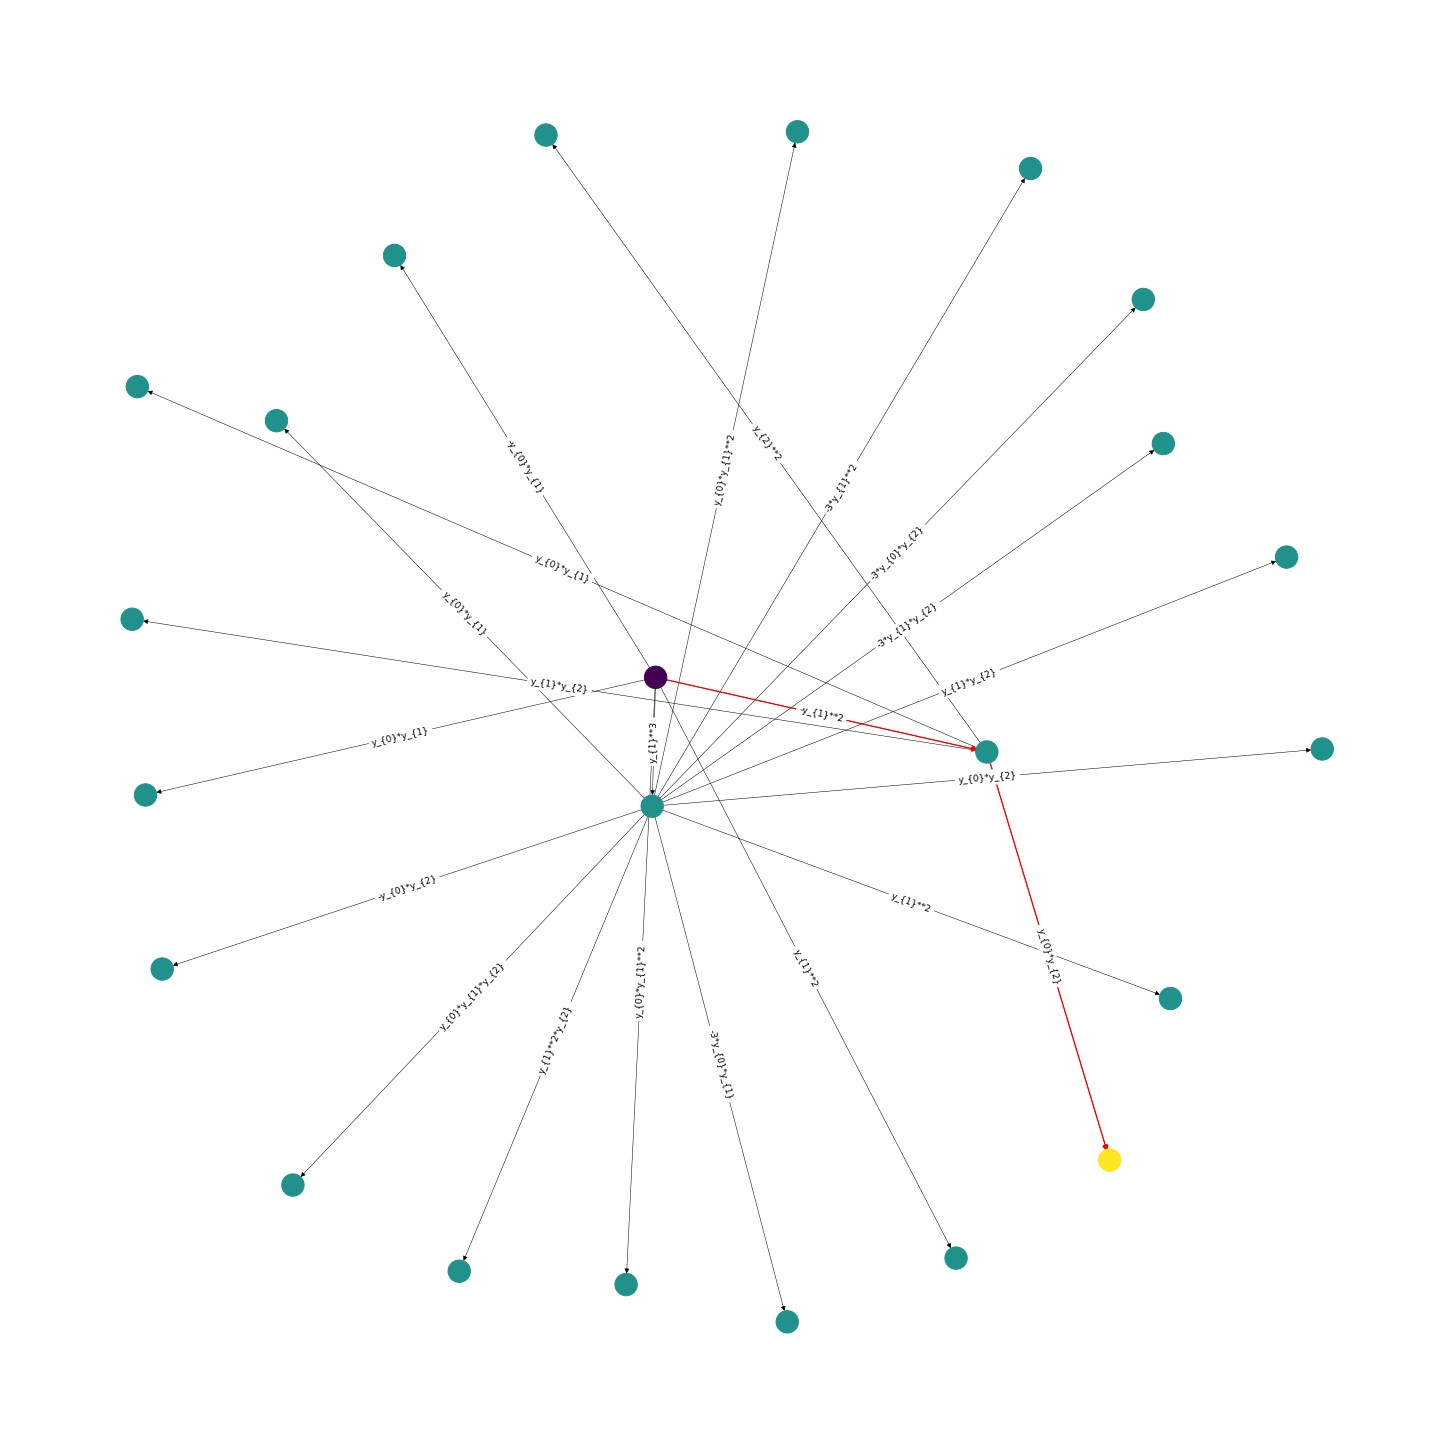

In [17]:
visualize('graph_log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


In [18]:
ql_system = system.quadratic_linearized(mode='optimal', auxiliary_eq_type='differential', method_optimal='iddfs',
                            heuristics='replacement-value', initial_max_depth=1, debug='info', log_file='log.csv')
ql_system.equations

System nodes queued:  98%|██████████████████████████████▏| 39/40 [00:01<00:00, 23.71node/s, Current max depth level: 1]


In [19]:
ql_system.statistics

steps: 6
Method's name: IDDFS
depth: 1

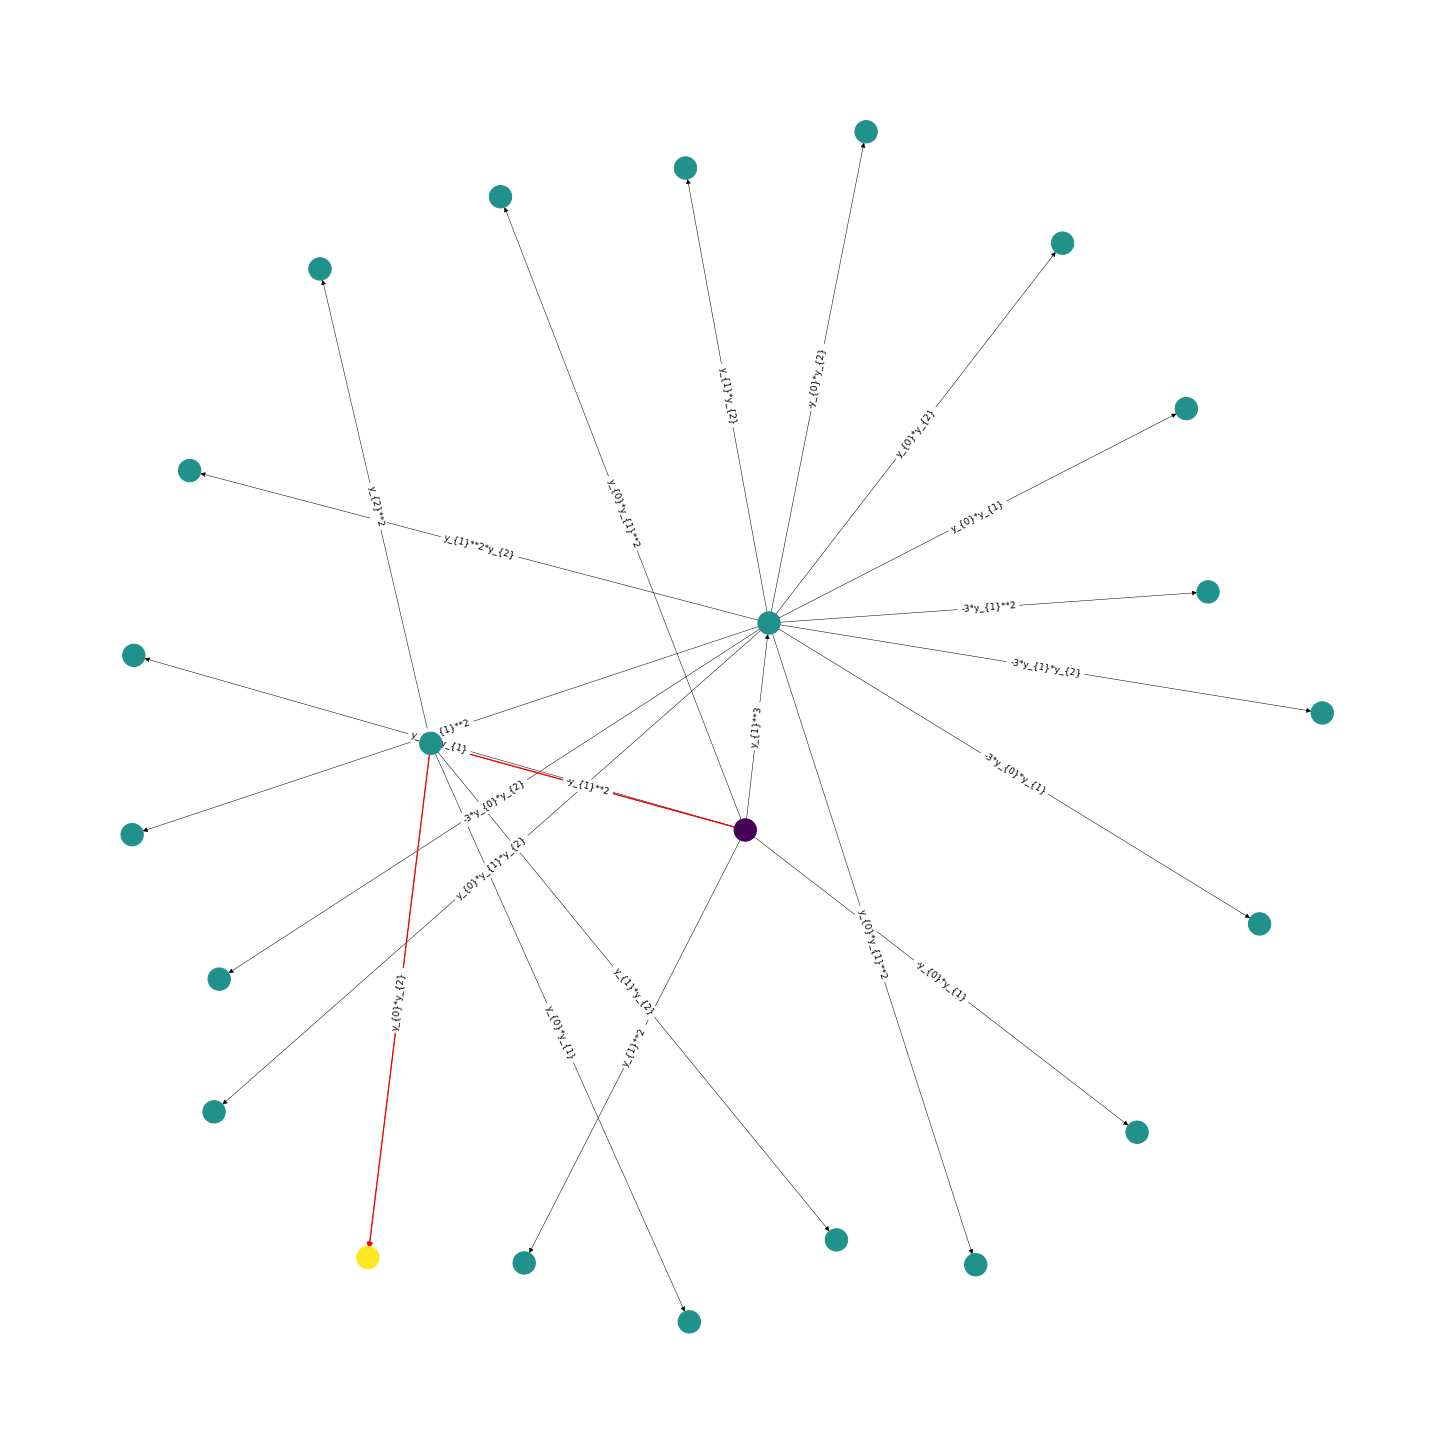

In [20]:
visualize('graph_log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)

# Tough Example

In [21]:
x = sp.symbols('x')
x_dot = make_derivative_symbol(x)

system = EquationSystem([
    sp.Eq(x_dot, x / (1 + sp.exp(x))),
])

system.equations

In [22]:
system.polynomialize()
system.equations

## BFS

In [23]:
ql_system = system.quadratic_linearized(mode='optimal', auxiliary_eq_type='differential', method_optimal='bfs',
                            debug='info', log_file='log.csv')
ql_system.equations

System nodes queued: 100%|██████████████████████████████▉| 4345/4346 [04:59<00:00, 14.50node/s, Current depth level: 2]


In [24]:
ql_system.statistics

steps: 160
Method's name: BFS
depth: 2

## ID-DFS with initial depth = 1

In [25]:
ql_system = system.quadratic_linearized(mode='optimal', auxiliary_eq_type='differential', method_optimal='iddfs',
                            heuristics='replacement-value', initial_max_depth=1, debug='info', log_file='log.csv')
ql_system.equations

System nodes queued: 100%|██████████████████████████▉| 2815/2816 [03:12<00:00, 14.62node/s, Current max depth level: 2]


In [26]:
ql_system.statistics

steps: 146
Method's name: IDDFS
depth: 2

## ID-DFS with initial depth = 2

In [27]:
ql_system = system.quadratic_linearized(mode='optimal', auxiliary_eq_type='differential', method_optimal='iddfs',
                            heuristics='replacement-value', initial_max_depth=2, debug='info', log_file='log.csv')
ql_system.equations

System nodes queued: 100%|██████████████████████████▉| 4294/4295 [05:15<00:00, 13.59node/s, Current max depth level: 2]


In [28]:
ql_system.statistics


steps: 156
Method's name: IDDFS
depth: 2